In [1]:
import pandas as pd

df_encoded = pd.read_pickle("../data/proccessed/data_encoded.pkl")


#select the targart and seprate the x and y 

In [2]:
y = df_encoded["Weekly_Sales"]

#the column that should remove from the data because it depended by the targart if we don't remove it the model will cheating as that expression

In [3]:
leakage_cols = [
    "Weekly_Sales",
    "lag_1",
    "lag_2",
    "lag_3",
    "lag_4",
    "roll_mean_4",
    "roll_median_4",
    "roll_std_4",
    "roll_mean_8",
    "roll_median_8",
    "roll_std_8",
    "pct_change_1",    
    "pct_change_4",
    "sales_to_store_mean",    
    "SalesRatio_x_Holiday",    
]
X = df_encoded.drop(columns = leakage_cols)
y = df_encoded['Weekly_Sales']

# fast check

In [4]:
X.shape, y.shape

((6435, 28), (6435,))

In [5]:
"Weekly_Sales" in X.columns

False

#delete or remove that columns that not correct to use to modeling like Date, prev_date, Important_Week_Reason because it string not good for modeling

In [6]:
X = X.drop(
    columns = ["Date", "prev_date", 'Important_Week_Reason'],
    errors = "ignore"
)

#make sure that not any columns depened on target 

In [7]:
X.columns

Index(['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Year', 'Month', 'Week', 'Quarter', 'dayOfYear', 'IsMonthStart',
       'IsMonthEnd', 'days_diff', 'Holiday_Event_Flag',
       'High_Sales_Event_Flag', 'Year_End_Flag', 'Important_Week_Flag',
       'store_mean', 'store_median', 'store_std', 'store_max', 'store_min',
       'Holiday_x_store_mean', 'Temp_x_week', 'Store_Encoded'],
      dtype='object')

#check the double and multicollinearity and check the correlation with out deletion now

In [8]:
corr = X.corr().abs()
high_corr = corr[corr > 0.95]
high_corr

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter,dayOfYear,...,Year_End_Flag,Important_Week_Flag,store_mean,store_median,store_std,store_max,store_min,Holiday_x_store_mean,Temp_x_week,Store_Encoded
Holiday_Flag,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Price,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPI,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unemployment,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.995984,0.967070,0.996060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Week,NaN,NaN,NaN,NaN,NaN,NaN,0.995984,1.000000,0.963870,0.999969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quarter,NaN,NaN,NaN,NaN,NaN,NaN,0.967070,0.963870,1.000000,0.963919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dayOfYear,NaN,NaN,NaN,NaN,NaN,NaN,0.996060,0.999969,0.963919,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
X.shape

(6435, 25)

#from above the corr there are strong correlation between month , week , quarter , dayofYear so if we saved all it will make noise in model so we clear the noise and make it more clearing so we well delete Month and dayOfYear keep just the week and quarter

In [10]:
feature_to_drop  = ['Month', 'dayOfYear']
X_reduced = X.drop(columns = feature_to_drop)
X_reduced.shape

(6435, 23)

#حذف الميزات ضعيفة التاثير(Variance Check)

In [11]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X_reduced)

selected_features = X_reduced.columns[selector.get_support()]
X_var = pd.DataFrame(X_var, columns=selected_features)

X_var.shape


(6435, 22)

In [12]:
X_var.columns

Index(['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Year', 'Week', 'Quarter', 'IsMonthStart', 'IsMonthEnd',
       'Holiday_Event_Flag', 'High_Sales_Event_Flag', 'Year_End_Flag',
       'Important_Week_Flag', 'store_mean', 'store_median', 'store_std',
       'store_max', 'store_min', 'Holiday_x_store_mean', 'Temp_x_week',
       'Store_Encoded'],
      dtype='object')

# Start and create the baseline model 

#import that package to create our base line model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

import numpy as np

#divide the data or seprate or split it to train and test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y, test_size=0.2, random_state=42)

#before the train model let's enhance that data for model by scalling because the scalling before train by ridge enhance the results

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train the baseline model 

In [16]:
ridge = Ridge(alpha=1.0, random_state=42)

ridge.fit(X_train_scaled, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


#التوقع   the prediction

In [17]:
y_pred = ridge.predict(X_test_scaled)

#the rate or (التقييم)

In [18]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(73287.95265218393, np.float64(115443.49853410487), 0.9586310336190768)

#فهم الأثر - تشخيص النموذج (Model Diagnostics)

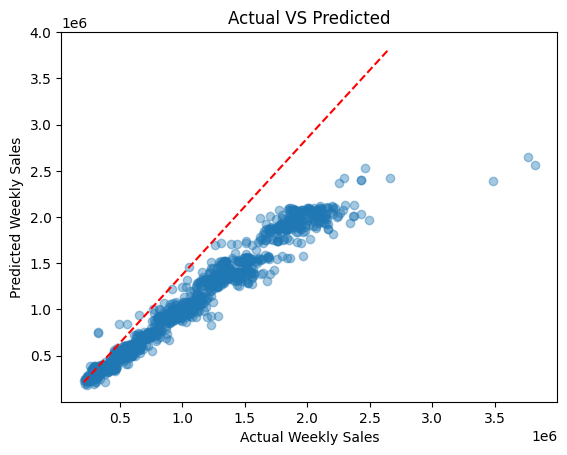

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_pred.max()],
         [y_test.min(), y_test.max()],'--r')

plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual VS Predicted")
plt.show()

#Residuals  هل النموذج متحيز؟

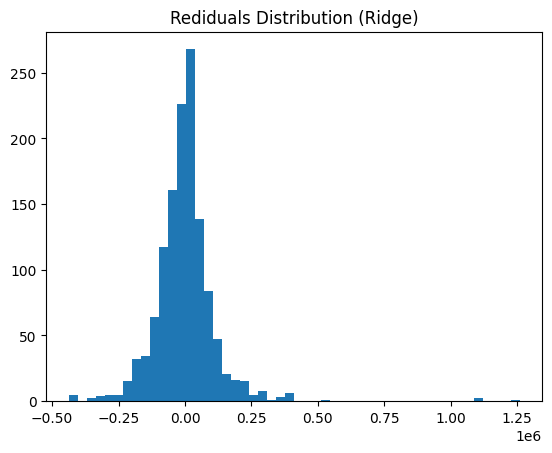

In [20]:
residuals = y_test - y_pred

plt.hist(residuals, bins=50)
plt.title("Rediduals Distribution (Ridge)")
plt.show()

#Feature Impact and see what the feature is more power than other

In [21]:
coef_df = pd.DataFrame({
  "feature" : X_train.columns,
  "coefficient" : ridge.coef_  
}).sort_values(by="coefficient", key = abs, ascending = False)

coef_df

,feature,coefficient
21,Store_Encoded,257358.360212
14,store_mean,257358.360210
20,Temp_x_week,-119741.510680
6,Week,118191.025928
11,High_Sales_Event_Flag,91163.063519
1,Temperature,64989.952400
15,store_median,48739.149123
17,store_max,-45809.475804
12,Year_End_Flag,-20163.099754
16,store_std,16961.378890


#تحسين ال Ridge نفسه قبل تغيير الموديول

In [22]:
from sklearn.linear_model import RidgeCV

alpha = [0.01, 0.1, 1, 10, 50, 100]
ridge_cv = RidgeCV(alpha, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

ridge_cv.alpha_

np.float64(0.1)

#after we do the enhance we try to repeat the train again 

In [23]:
ridge_best = Ridge(alpha = ridge_cv.alpha_)
ridge_best.fit(X_train_scaled, y_train)

y_pred = ridge_best.predict(X_test_scaled)
mean_absolute_error(y_test, y_pred), \
    np.sqrt(mean_squared_error(y_test, y_pred)), \
        r2_score(y_test, y_pred)

(73493.41027927246, np.float64(115628.5803757532), 0.9584982798089088)

# Model Improvement & Robust Validation

#first we should fix that train_test_split and change it with the Time-based split because our data is time series. if we don't fix it that cause Data leakage time series because the future combined with the past even that R^2 is high it may be not true

#sure that data is sorted as time series

In [24]:
from sqlalchemy import column


df_model = pd.concat([X_var, y], axis=1)
df_model = df_model.sort_values(by = ["Year", "Week"])

X_time = df_model.drop(columns = "Weekly_Sales")
y_time = df_model["Weekly_Sales"]



#Split that 20% to test as time

In [25]:
split_idx = int(len(df_model) * 0.80)

X_train = X_time.iloc[:split_idx]
X_test = X_time.iloc[split_idx:]

y_train = y_time.iloc[:split_idx]
y_test = y_time.iloc[split_idx:]

#Now Scaling that again

In [26]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#again we train the real baseline model again

In [27]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(66155.31781276864, np.float64(93085.69060121546), 0.9693711892631989)

#now again we do that Diagnostics it the same idea but here it have mean

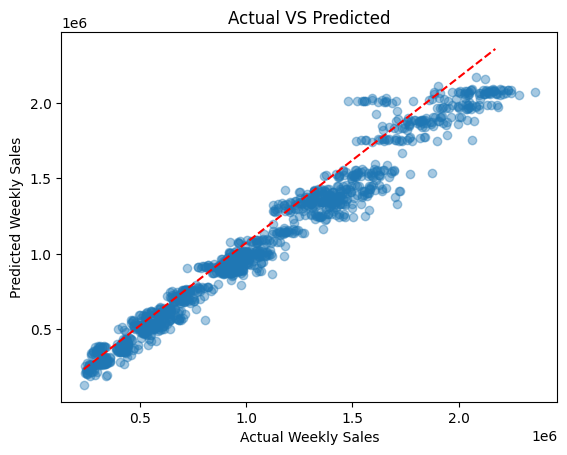

In [28]:
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_pred.max()],
         [y_test.min(), y_test.max()],'--r')

plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual VS Predicted")
plt.show()

#also the same for residuals

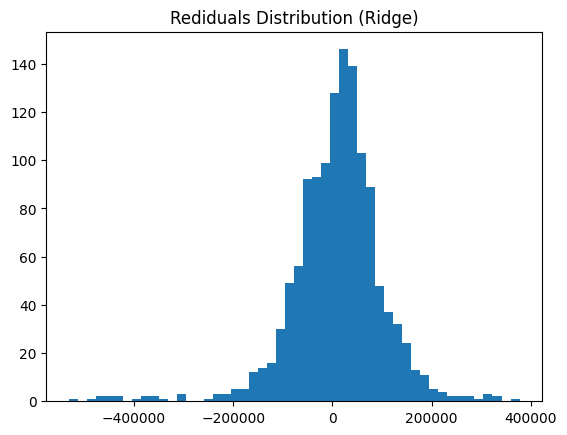

In [29]:
residuals = y_test - y_pred

plt.hist(residuals, bins=50)
plt.title("Rediduals Distribution (Ridge)")
plt.show()

#now we should make that model is fixed and we should it not change or wrong by compare that Train R^2 is nearly equal to Test R^2

In [30]:
y_train_pred = ridge_best.predict(X_train_scaled)

r2_score(y_train, y_train_pred),
r2_score(y_test, y_pred)

0.9693711892631989

# Test modeling that may be more powerfull than Ridge and chose the final model

In [31]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np 

xgb_model = XGBRegressor(
    n_estimators= 500,
    leanining_rate= 0.05,
    max_depth= 6,
    subsample= 0.8,
    colsample_bytree=0.8,
    random_state =43   
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

r2_xgb = r2_score(y_test, y_pred_xgb)

mae_xgb, rmse_xgb, r2_xgb

c:\PythonEnvironments\data_analysis_env\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:49:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "leanining_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


(62627.21648358586, np.float64(91350.58731094589), 0.9705023803293484)

#check the train performance and test performance

In [32]:
y_train_pred_xgb = xgb_model.predict(X_train)

r2_train = r2_score(y_train, y_train_pred_xgb)
r2_test = r2_score(y_test, y_pred_xgb)

r2_train, r2_test 

(0.9999531666833305, 0.9705023803293484)

#Check the Overfitting (Diangnosis)

In [33]:
import pandas as pd

feature_importance = pd.DataFrame({
    'feature' : X_train.columns,
    'importance' : xgb_model.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importance.head(10)

,feature,importance
14,store_mean,0.420855
11,High_Sales_Event_Flag,0.334582
15,store_median,0.194651
9,IsMonthEnd,0.008817
6,Week,0.007864
7,Quarter,0.003936
19,Holiday_x_store_mean,0.003734
17,store_max,0.003636
5,Year,0.002862
10,Holiday_Event_Flag,0.002712


#residual Analysis(تشخيص أخطاء النموذج)

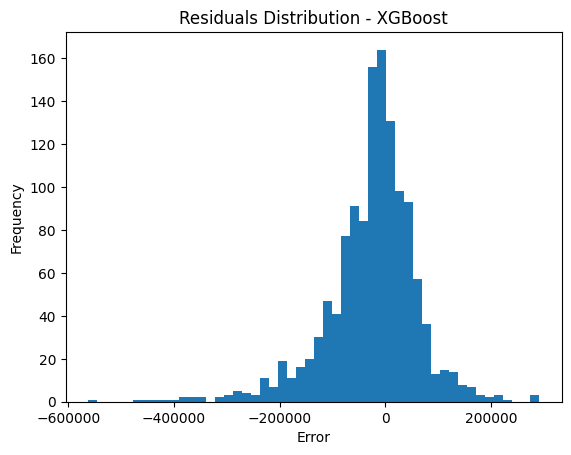

In [34]:
residuals = y_test - y_pred_xgb

import matplotlib.pyplot as plt

plt.hist(residuals, bins=50)
plt.title('Residuals Distribution - XGBoost')
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

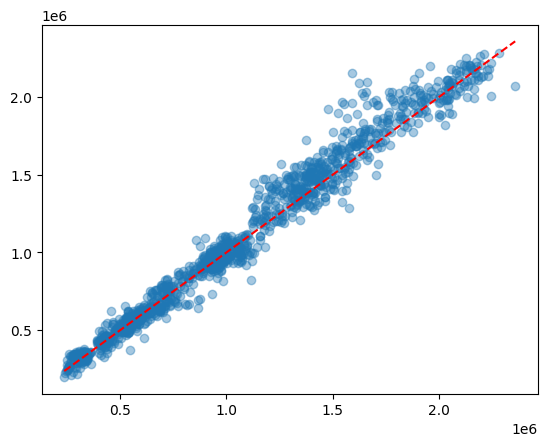

In [35]:
plt.scatter(y_test, y_pred_xgb, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--r')

#because the model of xgboost is strong more than ridge then we choose it and now we save it as our mean model

In [36]:
import joblib

joblib.dump(xgb_model, "../model/xgb_sales_model.pkl")

['../model/xgb_sales_model.pkl']

#now create the dataframe and file for predict to use it as visualizaition in Power bi

In [37]:
import numpy as np
import pandas as pd

pred_df = X_test.copy()
pred_df["Actual_Sales"] = y_test.values
pred_df["Predicted_Sales"] = y_pred_xgb
pred_df["Error"] = pred_df["Actual_Sales"] - pred_df["Predicted_Sales"]
pred_df["Abs_Error"] = pred_df["Error"].abs()
pred_df["Error_Type"] = np.where(pred_df["Error"] > 0, "Under_Prediction", "Over_Prediction")

if "Store" in df_encoded.columns:
    pred_df["Store"] = df_encoded.loc[X_test.index, "Store"].values
if "Date" in df_encoded.columns:
    pred_df["Date"] =  df_encoded.loc[X_test.index, "Date"].values
if "Week" in df_encoded.columns:
    pred_df["Week"] =  df_encoded.loc[X_test.index, "Week"].values
if "Year" in df_encoded.columns:
    pred_df["Year"] =  df_encoded.loc[X_test.index, "Year"].values
if "High_Sales_Event_Flag" in df_encoded.columns:
    pred_df["High_Sales_Event_Flag"] =  df_encoded.loc[X_test.index, "High_Sales_Event_Flag"].values

if "Holiday_Flag" in df_encoded.columns:
    pred_df["Holidy_Flag"] =  df_encoded.loc[X_test.index, "Holiday_Flag"].values

#the before Data frame and file that create  we should save it in powerbi folder to export it to the power bi and handle ot

In [38]:
pred_df.to_csv("../powerbi/sales_predictions_xgb.csv", index = False)

In [41]:
pred_df

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Week,Quarter,IsMonthStart,IsMonthEnd,...,Holiday_x_store_mean,Temp_x_week,Store_Encoded,Actual_Sales,Predicted_Sales,Error,Abs_Error,Error_Type,Date,Holidy_Flag
2688,0.0,44.42,4.187,137.868000,8.150,2012,15,2.0,0.0,0.0,...,0.0,666.30,1.444999e+06,1365098.46,1.489466e+06,-124367.1650,124367.1650,Over_Prediction,2012-04-13,0.0
2831,0.0,45.68,4.044,214.312703,7.139,2012,15,2.0,0.0,0.0,...,0.0,685.20,2.107677e+06,2045396.06,2.091473e+06,-46076.9400,46076.9400,Over_Prediction,2012-04-13,0.0
2974,0.0,69.03,3.891,221.148403,6.891,2012,15,2.0,0.0,0.0,...,0.0,1035.45,7.560691e+05,769319.04,7.318875e+05,37431.5400,37431.5400,Under_Prediction,2012-04-13,0.0
3117,0.0,49.89,4.025,141.843393,7.671,2012,15,2.0,0.0,0.0,...,0.0,748.35,1.028501e+06,939118.24,1.043529e+06,-104411.1350,104411.1350,Over_Prediction,2012-04-13,0.0
3260,0.0,41.81,4.025,137.868000,4.125,2012,15,2.0,0.0,0.0,...,0.0,627.15,1.389864e+06,1231752.54,1.439981e+06,-208228.2100,208228.2100,Over_Prediction,2012-04-13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5862,0.0,41.80,3.686,199.219532,6.195,2012,43,4.0,0.0,0.0,...,0.0,1797.40,1.268125e+06,1316542.59,1.335870e+06,-19327.0350,19327.0350,Over_Prediction,2012-10-26,0.0
6005,0.0,70.50,4.301,131.193097,6.943,2012,43,4.0,0.0,0.0,...,0.0,3031.50,5.564039e+05,514756.08,5.306157e+05,-15859.6075,15859.6075,Over_Prediction,2012-10-26,0.0
6148,0.0,69.17,3.506,214.741539,8.839,2012,43,4.0,0.0,0.0,...,0.0,2974.31,6.333247e+05,587603.55,6.201356e+05,-32532.0750,32532.0750,Over_Prediction,2012-10-26,0.0
6291,0.0,46.97,3.755,131.193097,5.217,2012,43,4.0,0.0,0.0,...,0.0,2019.71,3.027489e+05,361067.07,2.806681e+05,80399.0075,80399.0075,Under_Prediction,2012-10-26,0.0
